# Temporal Plot Over 24 Hour Cycles
Here we look at cycles of 24 hours of the moments

We calculate mean and such over 24 hours, which in a plot will produce a 3d curve over 24 days, so 24 points to the curve

End result: 24 points for each mice = 1 curve for each mice
16 curves for 16 mice each for mean, variance, skewness, kurtosis

The control mice are HEALTHY: 7,8,15,16



In [85]:
import pandas as pd
from scipy import stats
import numpy as np

mouse_df_list = list()

# pull 16 mice PCA data
for i in range(1,17):
    df = pd.read_excel("data/newmicedata/PCFAnimal{}.xlsx".format(i))
    mouse_df_list.append(df)

for i in range(len(mouse_df_list)):
    mouse_df_list[i] = mouse_df_list[i].drop(['Unnamed: 0'], axis=1)


mouse_df_list[0]

,DateTime,principal component 1,principal component 2,principal component 3
0,2022/11/04 14:01:00,17.132797,1.502005,-6.294937
1,2022/11/04 14:31:00,16.811791,2.291058,-7.172389
2,2022/11/04 15:01:00,15.028200,2.660764,-6.699671
3,2022/11/04 15:31:00,14.183293,2.758718,-5.704350
4,2022/11/04 16:01:00,11.949887,3.195511,-4.635048
...,...,...,...,...
1136,2022/11/28 06:01:00,-1.396782,-0.328081,-1.957727
1137,2022/11/28 06:31:00,-4.110406,0.404820,-0.490767
1138,2022/11/28 07:01:00,-0.687362,-0.372090,-2.771991
1139,2022/11/28 07:31:00,1.670424,-0.888519,-3.420816


In [86]:
# basically take moments every 48 rows

# Example 3: Get the first n rows of specified columns 
# print(df[['Courses', 'Fee', 'Duration', 'Discount']].iloc[:n])
print(mouse_df_list[0][['principal component 1']].iloc[:24])
n = 1141/48
n

    principal component 1
0               17.132797
1               16.811791
2               15.028200
3               14.183293
4               11.949887
5               12.119507
6               12.755418
7                2.407277
8                1.351935
9               13.223974
10              15.406819
11              10.910116
12              10.427273
13              14.212273
14              13.928744
15              12.099684
16               2.003236
17              -2.649612
18              -3.015082
19               3.434211
20              -0.824567
21              -1.574445
22              -3.373616
23              -2.635874


23.770833333333332

In [87]:
# 23 different points (24th is not a complete 24 hours)
DATAPOINTS = 23
NUMCOMPONENTS = 3

# these arrays contain arrays that represent curves, which contain 23 "points" each (arrays) which contain the 3 x y z coordinates
means = []
covs = []
skews = []
kurts = []
for mouse in mouse_df_list:
    # mouse_curve has 23 points in it
    mouse_curve_mean = []
    mouse_curve_cov = []
    mouse_curve_skew = []
    mouse_curve_kurt = []
    for i in range(1, DATAPOINTS + 1):
        mouse_mean = []
        mouse_cov = []
        mouse_skew = []
        mouse_kurt = []
        for j in range(1, NUMCOMPONENTS + 1):
            # grab the first 24 rows of that column
            # mouse is mouse n's dataFrame
            column = (mouse[['principal component {}'.format(j)]].iloc[(i * 48) - 48:i * 48]).to_numpy()
            # column is an array of arrays with one number in each inner array so refactor to just one array with 24 elements
            column_refactor = []
            for n in range(len(column)):
                column_refactor.append(column[n][0])
            # run moment calculations
            # column = df.to_numpy()
            col_moments = stats.describe(column_refactor)
            mouse_mean.append((col_moments).mean)
            mouse_cov.append((col_moments).variance)
            mouse_skew.append((col_moments).skewness)
            mouse_kurt.append((col_moments).kurtosis)
        mouse_curve_mean.append(mouse_mean)
        mouse_curve_cov.append(mouse_cov)
        mouse_curve_skew.append(mouse_skew)
        mouse_curve_kurt.append(mouse_kurt)
    means.append(mouse_curve_mean)
    covs.append(mouse_curve_cov)
    skews.append(mouse_curve_skew)
    kurts.append(mouse_curve_kurt)

print(len(means))
mouse_curve_kurt



16


[[-1.4831479071135023, -1.2680000317616198, -1.2811495275313278],
 [-1.7515928371958633, -1.6230267785377341, -1.62308114831041],
 [-1.7053042614712548, -1.613919463054078, -0.8629469554655085],
 [-1.3161894073791698, -1.3426586995339087, -0.4674460884274838],
 [-1.2492060891595984, -1.2741757053464264, 0.22125598266938473],
 [-0.9566888635611055, -1.3339393461814277, 1.3406822805352272],
 [-0.9939097755079511, -1.0958328488629059, 1.117647593544313],
 [-1.445026518479188, -1.4258838449646383, -0.10023506889335776],
 [-1.4728408244328797, -1.383080255574382, -0.7276528439907834],
 [-0.7583497408452153, -0.9019986609114423, -0.9499963946923469],
 [-1.0293920529290244, -0.5053182004350356, -0.36553008995066616],
 [-0.9642282236470456, -0.8278896040130328, -0.6666359627907537],
 [-1.1970491560204526, -0.6583690483017959, -0.24269583980682174],
 [-0.9867013934972633, -0.8834623150905192, -0.5292321730397056],
 [-1.1453952126519975, -0.8004204103658759, -0.661806405213869],
 [-1.12944206644

In [88]:
# create times to add back to curve df lists
times = []
for j in range(1, DATAPOINTS + 1):
    date = (mouse['DateTime'].iloc[(j * 48) - 48])
    times.append(date)

curves_df = []
# add DateTime column back to every mouse mean
for mean in means:
    mean_df = pd.DataFrame(mean, columns = ['PC_1', 'PC_2', 'PC_3'])
    mean_df['DateTime'] = times
    curves_df.append(mean_df)

mean_df

,PC_1,PC_2,PC_3,DateTime
0,8.088046,0.045167,-1.404612,2022/11/04 14:01:00
1,5.763668,0.182189,-0.848137,2022/11/05 14:01:00
2,5.062267,0.097740,-0.511607,2022/11/06 14:01:00
3,3.513602,-0.198166,0.956996,2022/11/07 14:01:00
4,3.496771,0.047351,0.635300,2022/11/08 14:01:00
5,2.405407,-0.143135,0.008829,2022/11/09 14:01:00
6,2.091982,-1.254267,0.934089,2022/11/10 14:01:00
7,2.702987,-1.210891,0.164107,2022/11/11 14:01:00
8,1.408727,-0.651537,0.362829,2022/11/12 14:01:00
9,1.870238,-1.366102,1.715062,2022/11/13 14:01:00


# Plotting the Curves

This part is achieved through taking the arrays and plotting 23 mean points for a certain mouse to create a curve in 3d space

In [89]:
# Trying Plotly for 3d graphs
import plotly.express as px
import plotly.graph_objects as go

# Visualizing the mean data points

# 23 different points
fig = px.line_3d(mean_df, x='PC_1', y='PC_2', z='PC_3', title='Mean Plot, Mouse 16')

# Define the coordinates and labels for the points you want to label
point_x = []
point_y = []
point_z = []
for curve in curves_df:
    point_x.append(curve.at[0, 'PC_1'])
    point_x.append(curve.at[DATAPOINTS - 1, 'PC_1'])
    point_y.append(curve.at[0, 'PC_2'])
    point_y.append(curve.at[DATAPOINTS - 1, 'PC_2'])
    point_z.append(curve.at[0, 'PC_3'])
    point_z.append(curve.at[DATAPOINTS - 1, 'PC_3'])

point_labels = ['1S', '1E', '2S', '2E', '3S', '3E', '4S', '4E', '5S', '5E', '6S', '6E', '7S', '7E', '8S', '8E', '9S', '9E', '10S', '10E', '11S', '11E', '12S', '12E', '13S', '13E', '14S', '14E', '15S', '15E', '16S', '16E', ]

# Create a scatter trace with text annotations for the labeled points
scatter_trace = go.Scatter3d(
    x=point_x,
    y=point_y,
    z=point_z,
    mode='markers+text',
    marker=dict(
        size=5,
        color='red',
    ),
    text=point_labels,
    textposition='bottom center',
    name='Labeled Points'
)

# Add the scatter trace to the figure
fig.add_trace(scatter_trace)

for i in range(len(curves_df) - 1):
    # Create additional line traces
    line_num = i + 1
    line_trace_n = go.Scatter3d(
        x=curves_df[i]['PC_1'].to_numpy(),
        y=curves_df[i]['PC_2'].to_numpy(),
        z=curves_df[i]['PC_3'].to_numpy(),
        mode='lines',
        name='Line {}'.format(line_num)
    )
    fig.add_trace(line_trace_n)

# fig.write_html("downloads/mean_cycle.html")
fig

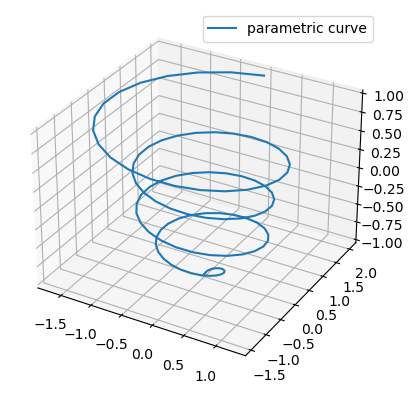

In [90]:
# Example code for graphing

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# Set legend font size
mpl.rcParams['legend.fontsize'] = 10

# Set the 3D graphics mode
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# test data
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-4, 4, 100) / 4
r = z**3 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)

# draw graphics
ax.plot(x, y, z, label='parametric curve')

# show legend
ax.legend()

# display graphics
plt.show()